In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import klib as kl
import os
import warnings

os.environ['KERAS_BACKEND']='tensorflow'
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = 'Kaiti'
plt.rcParams['axes.unicode_minus'] = False
PIC_PATH = "../../models/image/image1"
DATA_PATH = '../../data'
RESULT_PATH = '../../data/summary'

In [2]:
def create_dir(file_path):
    if os.path.exists(file_path):
        return
    os.makedirs(file_path)

create_dir(PIC_PATH)

In [3]:
short = pd.read_csv(DATA_PATH + '/short-customer-data.csv')
short

,user_id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,poutcome,y
0,BA2200001,56,housemaid,married,postgraduate,no,no,no,telephone,may,mon,261,nonexistent,no
1,BA2200002,57,services,married,high school,NaN,no,no,telephone,may,mon,149,nonexistent,no
2,BA2200077,37,services,married,high school,no,yes,no,telephone,may,mon,226,nonexistent,no
3,BA2200004,40,admin.,married,postgraduate,no,no,no,telephone,may,mon,151,nonexistent,no
4,BA2200005,56,services,married,high school,no,no,yes,telephone,may,mon,307,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,BA2241172,73,retired,married,junior college,no,yes,no,cellular,nov,fri,334,nonexistent,yes
41172,BA2241173,46,blue-collar,married,junior college,no,no,no,cellular,nov,fri,383,nonexistent,no
41173,BA2241174,56,retired,married,undergraduate,no,yes,no,cellular,nov,fri,189,nonexistent,no
41174,BA2241175,44,technician,married,junior college,no,no,no,cellular,nov,fri,442,nonexistent,yes


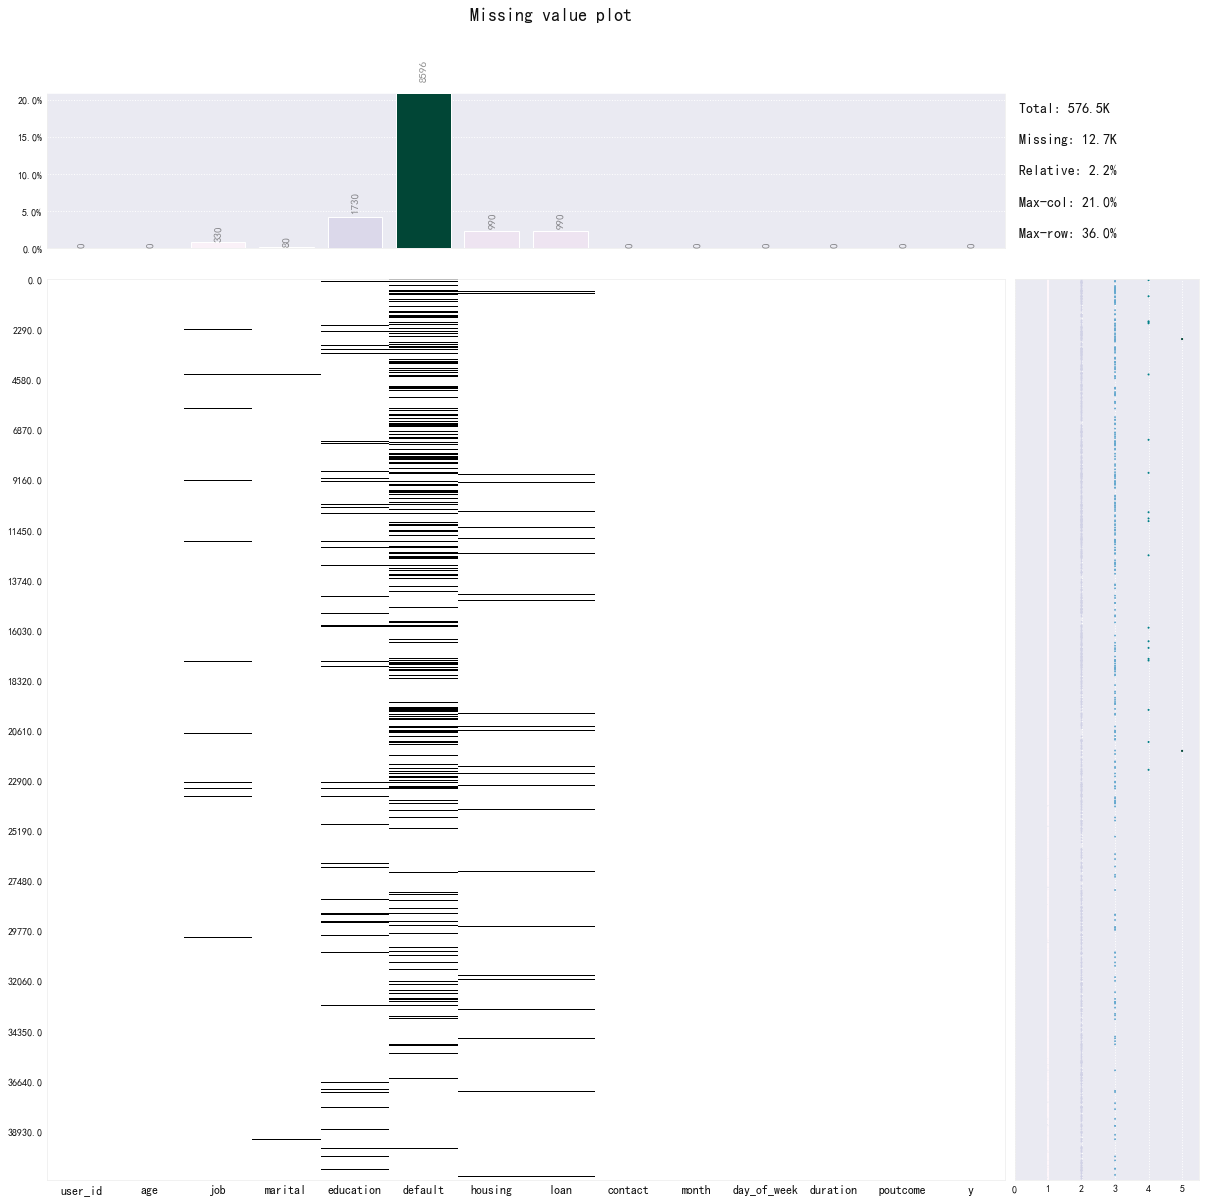

In [4]:
kl.missingval_plot(short)
plt.savefig(PIC_PATH + '/figure1.png', dpi=800)

In [5]:
short.count()

user_id        41176
age            41176
job            40846
marital        41096
education      39446
default        32580
housing        40186
loan           40186
contact        41176
month          41176
day_of_week    41176
duration       41176
poutcome       41176
y              41176
dtype: int64

In [6]:
short_clean = short.dropna(axis=0, how='any')
short_clean

,user_id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,poutcome,y
0,BA2200001,56,housemaid,married,postgraduate,no,no,no,telephone,may,mon,261,nonexistent,no
2,BA2200077,37,services,married,high school,no,yes,no,telephone,may,mon,226,nonexistent,no
3,BA2200004,40,admin.,married,postgraduate,no,no,no,telephone,may,mon,151,nonexistent,no
4,BA2200005,56,services,married,high school,no,no,yes,telephone,may,mon,307,nonexistent,no
6,BA2200007,59,admin.,married,junior college,no,no,no,telephone,may,mon,139,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,BA2241172,73,retired,married,junior college,no,yes,no,cellular,nov,fri,334,nonexistent,yes
41172,BA2241173,46,blue-collar,married,junior college,no,no,no,cellular,nov,fri,383,nonexistent,no
41173,BA2241174,56,retired,married,undergraduate,no,yes,no,cellular,nov,fri,189,nonexistent,no
41174,BA2241175,44,technician,married,junior college,no,no,no,cellular,nov,fri,442,nonexistent,yes


In [7]:
short_clean.drop_duplicates(subset='user_id', keep='last', inplace=True)
short_clean

,user_id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,poutcome,y
3,BA2200004,40,admin.,married,postgraduate,no,no,no,telephone,may,mon,151,nonexistent,no
4,BA2200005,56,services,married,high school,no,no,yes,telephone,may,mon,307,nonexistent,no
6,BA2200007,59,admin.,married,junior college,no,no,no,telephone,may,mon,139,nonexistent,no
8,BA2200009,24,technician,single,junior college,no,yes,no,telephone,may,mon,380,nonexistent,no
9,BA2200010,25,services,single,high school,no,yes,no,telephone,may,mon,50,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,BA2241172,73,retired,married,junior college,no,yes,no,cellular,nov,fri,334,nonexistent,yes
41172,BA2241173,46,blue-collar,married,junior college,no,no,no,cellular,nov,fri,383,nonexistent,no
41173,BA2241174,56,retired,married,undergraduate,no,yes,no,cellular,nov,fri,189,nonexistent,no
41174,BA2241175,44,technician,married,junior college,no,no,no,cellular,nov,fri,442,nonexistent,yes


In [8]:
short_clean['user_id'].nunique()

30445

In [9]:
create_dir(RESULT_PATH)
short_clean.to_excel(RESULT_PATH + '/result1_1.xlsx', index=False)

In [10]:
long = pd.read_csv(DATA_PATH + '/long-customer-train.csv')
long

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15553251,713,1,52,0,185891.54,1,1,1,46369.57,1
1,15553256,619,1,41,8,0.00,3,1,1,79866.73,1
2,15553283,603,1,42,8,91611.12,1,0,0,144675.30,1
3,15553308,589,1,61,1,0.00,1,1,0,61108.56,1
4,15553387,687,1,39,2,0.00,3,0,0,188150.60,1
...,...,...,...,...,...,...,...,...,...,...,...
9295,15815628,711,1,37,8,113899.92,1,0,0,80215.20,0
9296,15815645,481,0,37,8,152303.66,2,1,1,175082.20,0
9297,15815656,541,1,39,9,100116.67,1,1,1,199808.10,1
9298,15815660,758,1,34,1,154139.45,1,1,1,60728.89,0


In [11]:
kl.missingval_plot(long)
plt.savefig(PIC_PATH + '/figure2.png', dpi=800)

No missing values found in the dataset.


<Figure size 432x288 with 0 Axes>

In [12]:
long.describe()

,CustomerId,CreditScore,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9.300000e+03,9300.000000,9300.000000,9300.000000,9300.000000,9300.000000,9300.000000,9300.000000,9300.000000,9300.000000
mean,1.568666e+07,650.351505,0.453011,5.013763,76294.067038,1.529247,0.707849,0.516559,100189.168141,0.197527
std,7.444155e+04,96.481385,0.497814,2.891861,62428.995157,0.578409,0.454776,0.499753,57576.124288,0.398155
min,1.555325e+07,350.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.562326e+07,583.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50974.077500,0.000000
50%,1.568678e+07,651.000000,0.000000,5.000000,97016.180000,1.000000,1.000000,1.000000,100463.065000,0.000000
75%,1.575085e+07,717.000000,1.000000,8.000000,127527.637500,2.000000,1.000000,1.000000,149507.082500,0.000000
max,1.581569e+07,850.000000,1.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [13]:
def clean_age(num):
    import re
    rule = '\d'
    res = re.findall(rule, num)
    if len(list(res)) > 0:
        return int("".join(res))
    return np.nan

age = long['Age'].apply(clean_age)
age

0       52.0
1       41.0
2       42.0
3       61.0
4       39.0
        ... 
9295    37.0
9296    37.0
9297    39.0
9298    34.0
9299    40.0
Name: Age, Length: 9300, dtype: float64

In [14]:
age = np.where(age<=0, np.nan, age)
long['Age'] = age
long

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15553251,713,1,52.0,0,185891.54,1,1,1,46369.57,1
1,15553256,619,1,41.0,8,0.00,3,1,1,79866.73,1
2,15553283,603,1,42.0,8,91611.12,1,0,0,144675.30,1
3,15553308,589,1,61.0,1,0.00,1,1,0,61108.56,1
4,15553387,687,1,39.0,2,0.00,3,0,0,188150.60,1
...,...,...,...,...,...,...,...,...,...,...,...
9295,15815628,711,1,37.0,8,113899.92,1,0,0,80215.20,0
9296,15815645,481,0,37.0,8,152303.66,2,1,1,175082.20,0
9297,15815656,541,1,39.0,9,100116.67,1,1,1,199808.10,1
9298,15815660,758,1,34.0,1,154139.45,1,1,1,60728.89,0


In [15]:
long[long['Age'].isna()]

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
464,15570485,558,0,NaN,4,161766.87,1,0,0,92378.54,0
566,15573452,663,0,NaN,7,115930.87,1,1,0,19862.78,0
651,15576000,765,0,NaN,6,138033.55,1,1,1,67972.45,0
696,15577064,592,0,NaN,2,104702.65,2,1,0,107948.72,0
796,15580068,526,0,NaN,5,0.00,2,1,1,105618.14,0
...,...,...,...,...,...,...,...,...,...,...,...
8723,15799710,739,0,NaN,7,104960.46,1,0,1,80883.82,0
8776,15801062,557,1,NaN,4,0.00,2,0,1,105433.53,0
8794,15801417,657,0,NaN,4,82500.28,1,1,1,115260.72,0
8836,15802585,634,1,NaN,8,68213.99,1,1,1,6382.46,0


In [16]:
long.dropna(axis=0, how='any', inplace=True)
long.to_excel(RESULT_PATH + '/result1_2.xlsx')

In [17]:
def encoder(default):
    if default == 'yes':
        return 1
    return 0

short_clean['default'] = short_clean['default'].apply(encoder)
short_clean

,user_id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,poutcome,y
3,BA2200004,40,admin.,married,postgraduate,0,no,no,telephone,may,mon,151,nonexistent,no
4,BA2200005,56,services,married,high school,0,no,yes,telephone,may,mon,307,nonexistent,no
6,BA2200007,59,admin.,married,junior college,0,no,no,telephone,may,mon,139,nonexistent,no
8,BA2200009,24,technician,single,junior college,0,yes,no,telephone,may,mon,380,nonexistent,no
9,BA2200010,25,services,single,high school,0,yes,no,telephone,may,mon,50,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,BA2241172,73,retired,married,junior college,0,yes,no,cellular,nov,fri,334,nonexistent,yes
41172,BA2241173,46,blue-collar,married,junior college,0,no,no,cellular,nov,fri,383,nonexistent,no
41173,BA2241174,56,retired,married,undergraduate,0,yes,no,cellular,nov,fri,189,nonexistent,no
41174,BA2241175,44,technician,married,junior college,0,no,no,cellular,nov,fri,442,nonexistent,yes


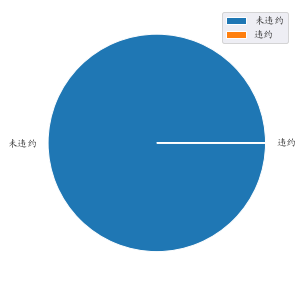

In [18]:
value_counts = short_clean['default'].value_counts()
plt.figure(figsize=(8, 5))
plt.pie(value_counts, labels=['未违约', '违约'])
plt.legend()
plt.savefig(PIC_PATH + '/figure2.png', dpi=800)

In [19]:
long.to_excel(RESULT_PATH + '/result1_3.xlsx')